### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>


 #### Q1. Remove missing data
 
Please remove the following records in the csv file: 
 
 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [39]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

# data frame
df = pd.read_csv('The E-commerce Dataset.csv')
df

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
...,...,...,...,...,...,...,...,...,...,...,...
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.00,18
19996,10806,82201,What more can you ask for????,Olive Garden,4.0,0.0,M,Restaurants & Gourmet,49,32.00,28
19997,10806,82201,Excellent steak for a good price,Outback Steakhouse,4.0,3.0,M,Restaurants & Gourmet,50,25.00,28
19998,10807,31504,Different story world,J. K. Rowling - Harry Potter and the Sorcerer'...,4.0,0.0,M,Books,36,96.00,27


In [2]:
# number of null in each column
df.isnull().sum()

userId          0
timestamp       0
review          0
item            0
rating         17
helpfulness    22
gender         27
category        0
item_id         0
item_price      0
user_city       0
dtype: int64

In [3]:
# length of the data before cleansing
len (df)

20000

In [11]:
# data cleansing remove gender/rating/helpfulness
df_cleaned = df.dropna()
df_cleaned

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
...,...,...,...,...,...,...,...,...,...,...,...
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.00,18
19996,10806,82201,What more can you ask for????,Olive Garden,4.0,0.0,M,Restaurants & Gourmet,49,32.00,28
19997,10806,82201,Excellent steak for a good price,Outback Steakhouse,4.0,3.0,M,Restaurants & Gourmet,50,25.00,28
19998,10807,31504,Different story world,J. K. Rowling - Harry Potter and the Sorcerer'...,4.0,0.0,M,Books,36,96.00,27


In [12]:
# data cleansing convert "none" in review column into blank column
df_cleaned = df_cleaned[df_cleaned.review != "none"]
df_cleaned.loc[(df_cleaned['review'] == 'none')]

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city


In [13]:
# length of the data after cleansing
len(df_cleaned)

19916

#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders 
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items 


In [19]:
# Q2.1 total number of unique users, unique reviews, unique items, and unique categories
print ("Total number of unique users is ", df_cleaned.userId.nunique())
print ("Total number of unique reviews is ", df_cleaned.review.nunique())
print ("Total number of unique items is ", df_cleaned.item.nunique())
print ("Total number of unique categories is ", df_cleaned.category.nunique())

Total number of unique users is  8562
Total number of unique reviews is  19459
Total number of unique items is  89
Total number of unique categories is  9


In [24]:
# Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
df_cleaned.rating.describe()

count    19916.000000
mean         3.701798
std          1.404451
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [29]:
# Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
df_gender = df_cleaned.groupby(['gender'])['item'].count()
df_gender

gender
F     9793
M    10123
Name: item, dtype: int64

In [30]:
# Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
df_gender.describe()

count        2.000000
mean      9958.000000
std        233.345238
min       9793.000000
25%       9875.500000
50%       9958.000000
75%      10040.500000
max      10123.000000
Name: item, dtype: float64

In [33]:
# Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items
df_rating = df_cleaned.groupby(['item'])['rating'].count()
df_rating

item
AOL (America Online)     939
All Advantage            657
Alta Vista (by 1stUp)    157
Amazon.com               240
American Airlines        185
                        ... 
Wendy's                  210
What Lies Beneath        160
X-Men                    245
X.com                    173
eBay                     596
Name: rating, Length: 89, dtype: int64

In [34]:
# Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items
df_rating.describe()

count     89.000000
mean     223.775281
std      116.418988
min      139.000000
25%      162.000000
50%      187.000000
75%      245.000000
max      939.000000
Name: rating, dtype: float64

#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

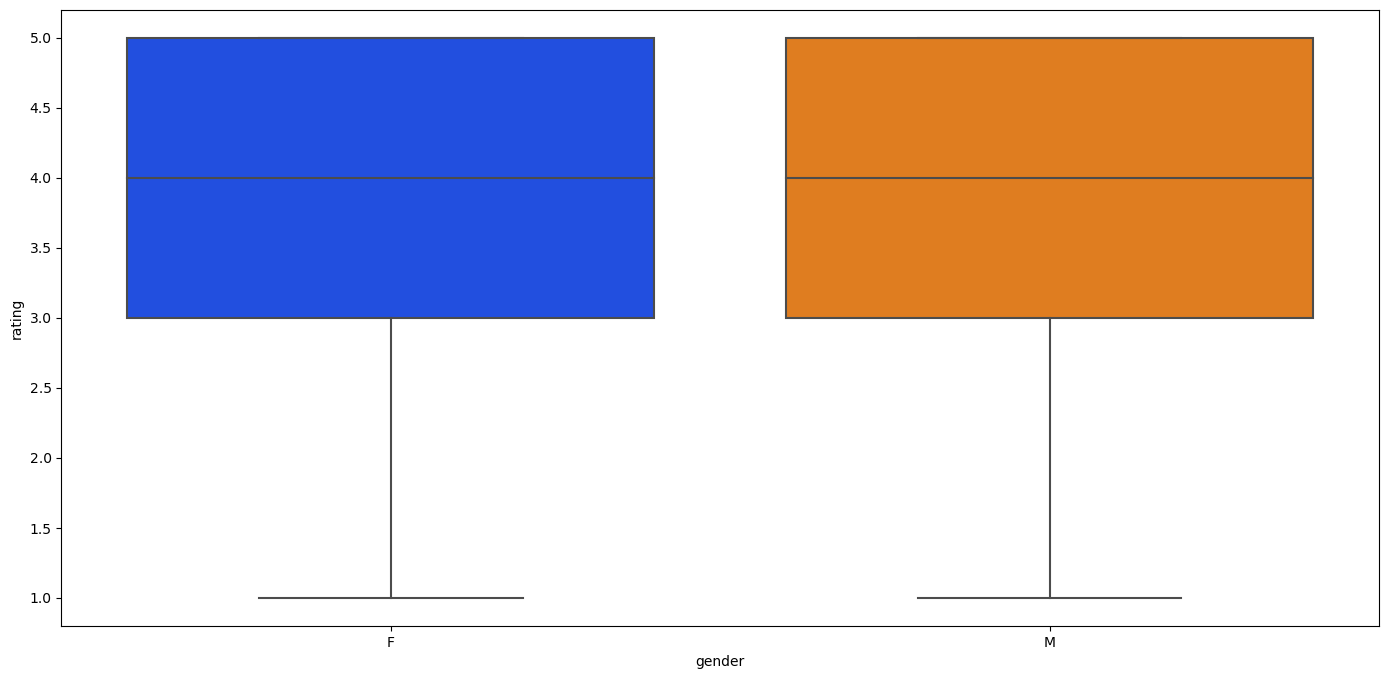

In [44]:
# gender and rating correlation
plt.figure(figsize = (17,8))
ax = sns.boxplot(x = 'gender', y = 'rating', palette = 'bright', data = df_cleaned)

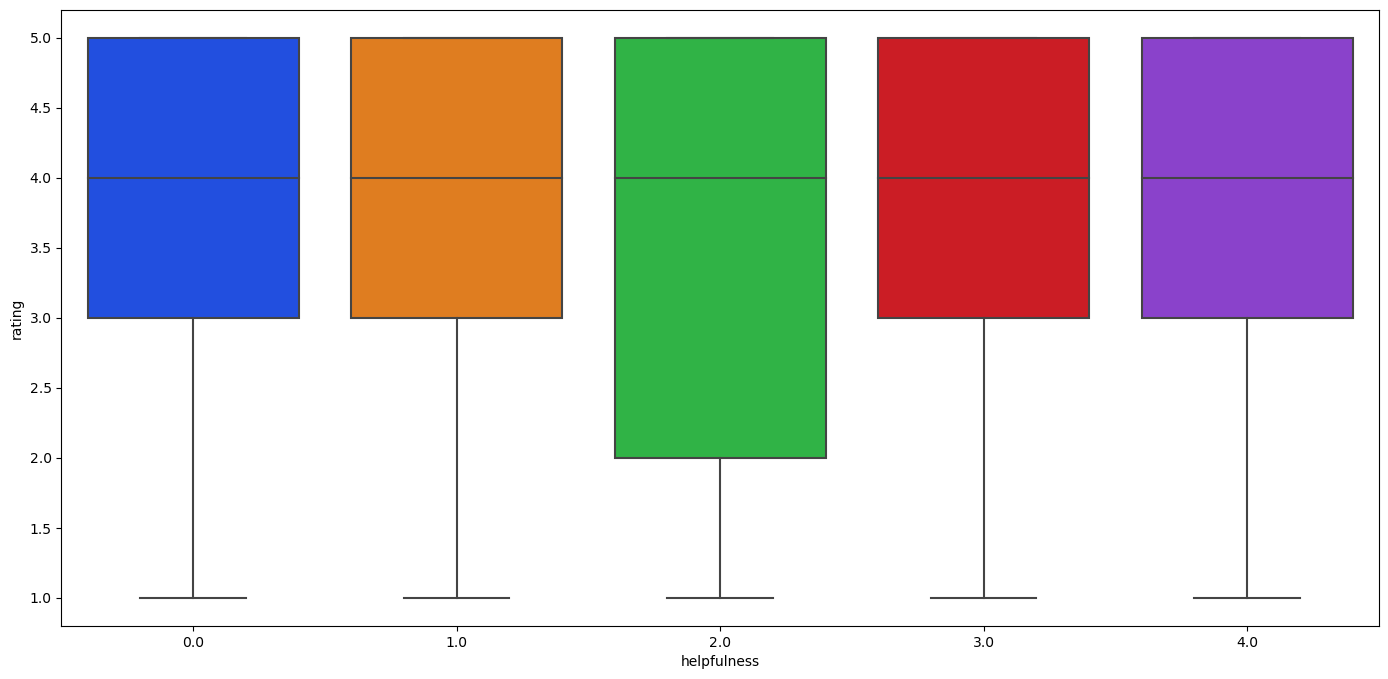

In [45]:
# helpfulness and rating correlation
plt.figure(figsize = (17,8))
ax = sns.boxplot(x = 'helpfulness', y = 'rating', palette = 'bright', data = df_cleaned)

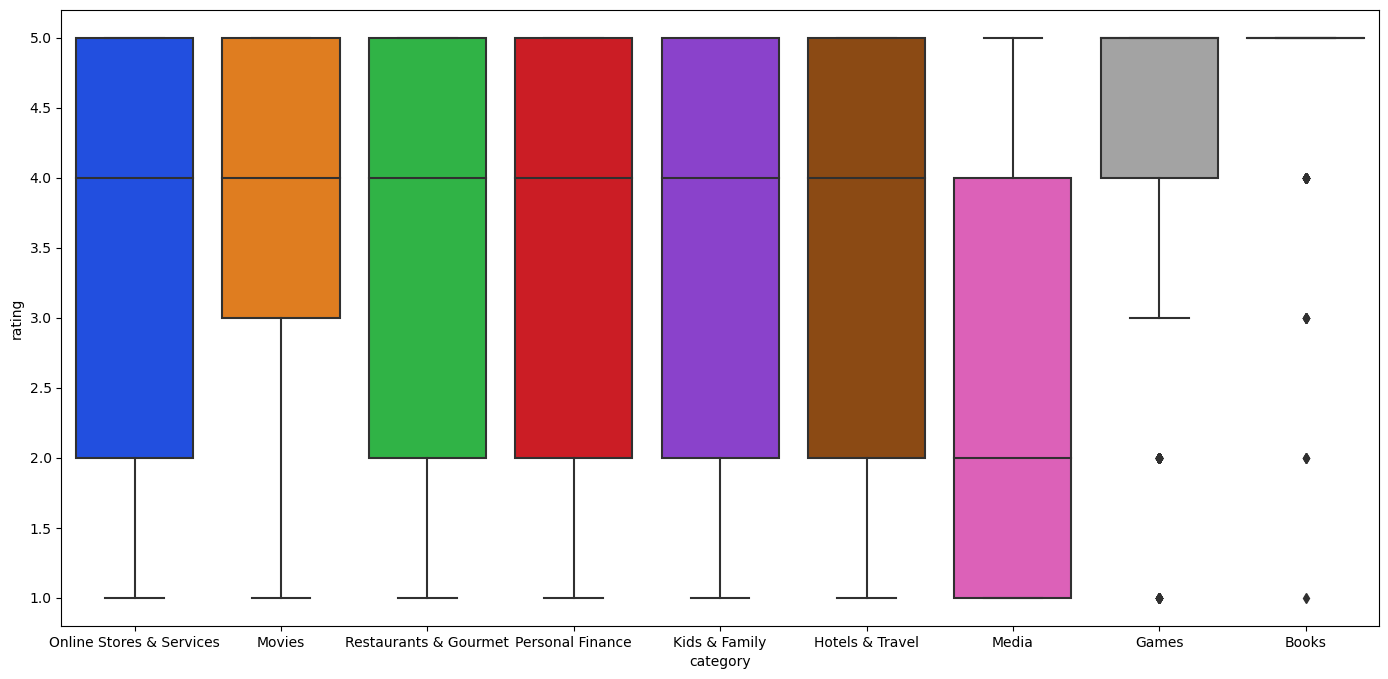

In [41]:
# category and rating correlation
plt.figure(figsize = (17,8))
ax = sns.boxplot(x = 'category', y = 'rating', palette = 'bright', data = df_cleaned)

### Analysis and Observation
* Overall, the rating distribution in terms of the majority category is quite similar
* Media category items tend to receive lower ratings compared to other categories
* While, game category items have smaller variance and their lowest ratings are only 4 which is the highest compared to other categories lowest ratings
* The impact of the category on ratings is also larger compared to genders on ratings

### Q4. Detect and remove outliers>

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):
* reviews of which the helpfulness is no more than 2
* users who rate less than 7 items
* items that receives less than 11 ratings 
 
Please remove the corresponding records in the csv file that involves outlier users, reviews and items. After that, __print the length of the data__.

In [48]:
# the reviews of which the helpfulness is no more than 2
remove_outlier_df = df_cleaned.drop(df_cleaned.index[(df_cleaned['helpfulness'] <= 2)])
print('the number of user after removing outlier helpfulness', len(remove_outlier_df))

the number of user after removing outlier helpfulness 13643


In [49]:
# group users by their ids and count the number of their ratings
group_user_df = remove_outlier_df.groupby(['userId'])['rating'].count().reset_index(name = 'count')
print('the number of user after removing outlier helpfulness', len(group_user_df))

the number of user after removing outlier helpfulness 6535


In [50]:
group_user_df.head()

,userId,count
0,0,3
1,1,1
2,2,2
3,3,2
4,4,7


In [51]:
# remove the ids of users who have rated no less than 7 times
userIds = group_user_df[group_user_df['count'] >= 7]['userId'].tolist()
print(len(userIds))

267


In [52]:
# filter users who have rated less than 7 times
remove_outlier_df = remove_outlier_df[remove_outlier_df['userId'].isin(userIds)]

In [53]:
print ('the length of data is', len (remove_outlier_df))

the length of data is 2741


In [54]:
# group items by their names and count the number of their ratings
group_item_df = remove_outlier_df.groupby(['item'])['rating'].count().reset_index(name = 'count')
group_item_df.head()

,item,count
0,AOL (America Online),93
1,All Advantage,72
2,Alta Vista (by 1stUp),10
3,Amazon.com,18
4,American Airlines,19


In [55]:
# get the names of items that have recieved no less than 11 ratings
items = group_item_df[group_item_df['count'] >= 11]['item'].tolist()
print(len(items))

82


In [56]:
# filter items that have received less than 11 ratings
remove_outlier_df = remove_outlier_df[remove_outlier_df['item'].isin(items)]
len(remove_outlier_df)

2685

In [57]:
# export the processed data as csv file
remove_outlier_df.to_csv('ECommerce_data_clean.csv', index = False)